In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Hp\\Desktop'

In [3]:
os.chdir('C://Users//Hp')

In [4]:
df1=pd.read_csv("data1.csv")
df1

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3
0,0,1,Spider-Man: Across the Spider-Verse,140,2023,9.0,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson
1,1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN
2,2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1751,1751,"1,752",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN
1752,1752,"1,753",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN
1753,1753,"1,754",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN
1754,1754,"1,755",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN


In [5]:
df2=pd.read_csv("data2.csv")
df2

,Unnamed: 0,MovieName,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,0,Spider-Man: Across the Spider-Verse,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"134,603"
1,1,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,726,773"
2,2,The Lord of the Rings: The Return of the King,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,891,735"
3,3,Inception,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,420,015"
4,4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,920,289"
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,1751,Radhe,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,935"
1752,1752,Race 3,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,714"
1753,1753,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,919"
1754,1754,The Cost of Deception,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,580"


In [6]:
df=pd.DataFrame()

In [7]:
df=pd.merge(df1, df2)
df

,Unnamed: 0,S No.,MovieName,Duration,Year,Rating,Metascore,Director1,Director2,Director3,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,0,1,Spider-Man: Across the Spider-Verse,140,2023,9.0,86,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,Animation,Action,Adventure,Nan,PG,"134,603"
1,1,2,The Dark Knight,152,2008,9.0,84,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Action,Crime,Drama,534.86,PG-13,"2,726,773"
2,2,3,The Lord of the Rings: The Return of the King,201,2003,9.0,94,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Action,Adventure,Drama,377.85,PG-13,"1,891,735"
3,3,4,Inception,148,2010,8.8,74,Christopher Nolan,NaN,NaN,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Action,Adventure,Sci-Fi,292.58,PG-13,"2,420,015"
4,4,5,The Lord of the Rings: The Fellowship of the Ring,178,2001,8.8,92,Peter Jackson,NaN,NaN,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,Action,Adventure,Drama,315.54,PG-13,"1,920,289"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,1751,"1,752",Radhe,109,2021,1.9,Nan,Prabhu Deva,NaN,NaN,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,Action,Crime,Thriller,Nan,TV-MA,"178,935"
1752,1752,"1,753",Race 3,160,2018,1.9,Nan,Remo D'Souza,NaN,NaN,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,Action,Crime,Thriller,1.69,Not Rated,"47,714"
1753,1753,"1,754",Angels Apocalypse,85,2015,1.6,Nan,Sean Cain,Enzo Zelocchi,NaN,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,Action,Fantasy,Sci-Fi,Nan,Nan,"42,919"
1754,1754,"1,755",The Cost of Deception,125,2021,1.5,Nan,Keith English,NaN,NaN,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,Action,Crime,Drama,Nan,Nan,"39,580"


In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756 entries, 0 to 1755
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1756 non-null   object 
 1   MovieName        1756 non-null   object 
 2   Duration         1756 non-null   int64  
 3   Year             1756 non-null   int64  
 4   Rating           1756 non-null   float64
 5   Metascore        1756 non-null   object 
 6   Director1        1756 non-null   object 
 7   Director2        113 non-null    object 
 8   Director3        13 non-null     object 
 9   Star1            1756 non-null   object 
 10  Star2            1756 non-null   object 
 11  Star3            1756 non-null   object 
 12  Star4            1756 non-null   object 
 13  Genre1           1756 non-null   object 
 14  Genre2           1756 non-null   object 
 15  Genre3           1756 non-null   object 
 16  GrossCollection  1756 non-null   object 
 17  Certification 

In [10]:
# Value counts for each feature data
for i in df.columns:
    print(df[i].value_counts())
    print("no of unique values",df[i].nunique())
    print('*****************')

1        1
1,168    1
1,179    1
1,178    1
1,177    1
        ..
582      1
581      1
580      1
579      1
1,756    1
Name: S No., Length: 1756, dtype: int64
no of unique values 1756
*****************
G                                3
Mr                               3
Clash of the Titans              2
Guardians of the Galaxy Vol      2
The Three Musketeers             2
                                ..
National Treasure                1
Atlantis: The Lost Empire        1
Robin Hood: Prince of Thieves    1
Iron Man 2                       1
Sadak 2                          1
Name: MovieName, Length: 1715, dtype: int64
no of unique values 1715
*****************
107    49
100    43
109    42
110    41
102    40
       ..
242     1
166     1
45      1
67      1
78      1
Name: Duration, Length: 119, dtype: int64
no of unique values 119
*****************
2016    78
2014    77
2018    70
2011    69
2019    67
        ..
1948     1
1932     1
1949     1
1938     1
1965     1
Name: Yea

In [11]:
df.replace("Nan", np.nan, inplace=True)

In [12]:
df.isnull().sum()

S No.                 0
MovieName             0
Duration              0
Year                  0
Rating                0
Metascore           185
Director1             0
Director2          1643
Director3          1743
Star1                 0
Star2                 1
Star3                 1
Star4                 2
Genre1                0
Genre2                2
Genre3              145
GrossCollection     283
Certification        10
votes                 0
dtype: int64

Dropping off columns Director 2 and Director 3 as maxiumum entries are null values.

In [13]:
df.drop(["Director2","Director3"], axis=1, inplace=True)

Using mode to fill null values for object columns - Metascore, Certification and genre 3

In [14]:
df['Metascore']=df['Metascore'].fillna(df['Metascore'].mode()[0])
df['Certification']=df['Certification'].fillna(df['Certification'].mode()[0])
df['Genre3']=df['Genre3'].fillna(df['Genre3'].mode()[0])

First we converted column Gross collection to float dataype and then used mean to fill null values.

In [15]:
df['GrossCollection']=df['GrossCollection'].astype(float)
df['GrossCollection']=df['GrossCollection'].fillna(df['GrossCollection'].mean())

In [16]:
df.isnull().sum().sum()

6

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.duplicated().sum()

0

All null values have been treated or removed. No duplicates are there in the dataset.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 0 to 1755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S No.            1752 non-null   object 
 1   MovieName        1752 non-null   object 
 2   Duration         1752 non-null   int64  
 3   Year             1752 non-null   int64  
 4   Rating           1752 non-null   float64
 5   Metascore        1752 non-null   object 
 6   Director1        1752 non-null   object 
 7   Star1            1752 non-null   object 
 8   Star2            1752 non-null   object 
 9   Star3            1752 non-null   object 
 10  Star4            1752 non-null   object 
 11  Genre1           1752 non-null   object 
 12  Genre2           1752 non-null   object 
 13  Genre3           1752 non-null   object 
 14  GrossCollection  1752 non-null   float64
 15  Certification    1752 non-null   object 
 16  votes            1752 non-null   object 
dtypes: float64(2),

GTreating all columns which should be integer datatype but are object datatype.

In [21]:
df['Metascore'] = df['Metascore'].astype(int)
df['votes'] = df['votes'].str.replace(',', '').astype(int)
df['S No.'] = df['S No.'].str.replace(',', '').astype(int)

# EDA

In [22]:
df.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

#### Duration

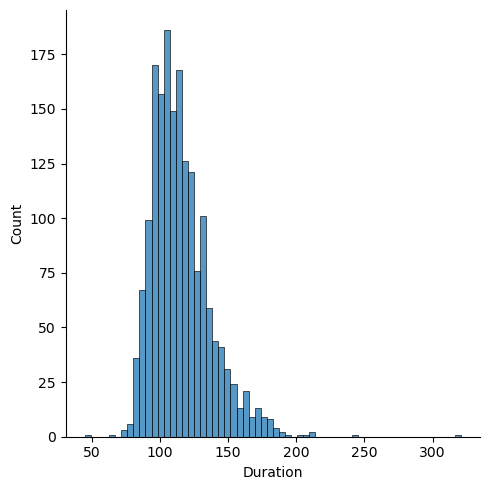

In [23]:
sns.displot(data=df, x="Duration",)

    Most movies are 90 to 120 minutes long.
    Very less movies are there which are less than 60 minutes or more than 200 minutes.


#### Year

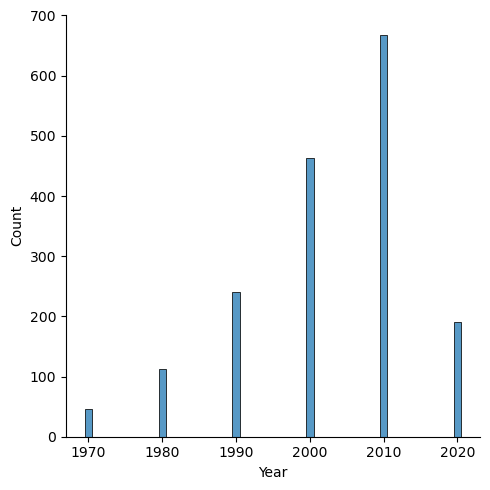

In [24]:
# Number of movies launched in the decades
sns.displot(pd.cut(df['Year'], bins=range(1970, 2031, 10), right=False, labels=range(1970, 2030, 10)))
plt.show()

Most movies have been launched in the decade of 2000-2010.

#### Relation between years and ratings

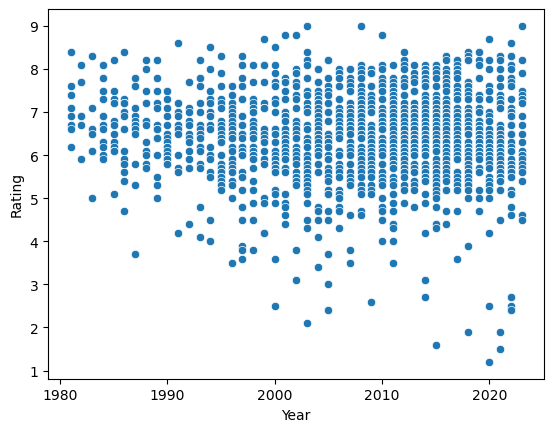

In [25]:
sns.scatterplot(x=df["Year"][df["Year"]>1980],y=df["Rating"])
plt.show()

    Highest rated movies have been released in years between 2000-2010.
    Some of new movies launched between year 2015-2020 has been the lowest rated movies.
    Trend can be seen that old movies have mostly received high ratings while some of the newer movies have received   very low ratings.

#### Metascore

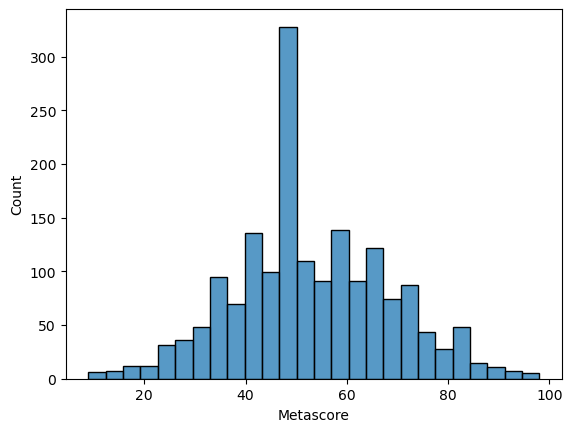

In [26]:
sns.histplot(x=df["Metascore"])
plt.show()

Metascore varies between 0 to 100 while most movies has metascore lies around 50 

#### Genre

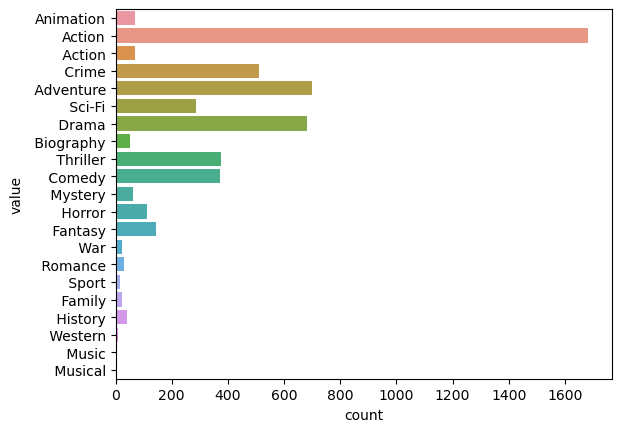

In [27]:
sns.countplot(data=pd.melt(df, value_vars=["Genre1", "Genre2", "Genre3"]), y="value")
plt.show()

Most movies are of action genre. While crime, adventure Sci-fi and drama are most common genre.

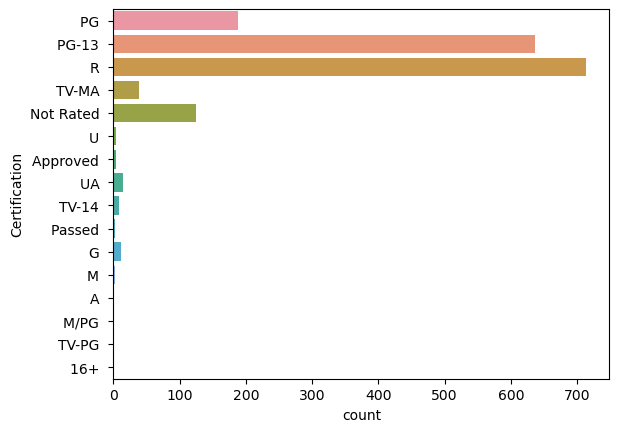

In [28]:
sns.countplot(y=df["Certification"])
plt.show()

Most movies are PG-13 and R rated.

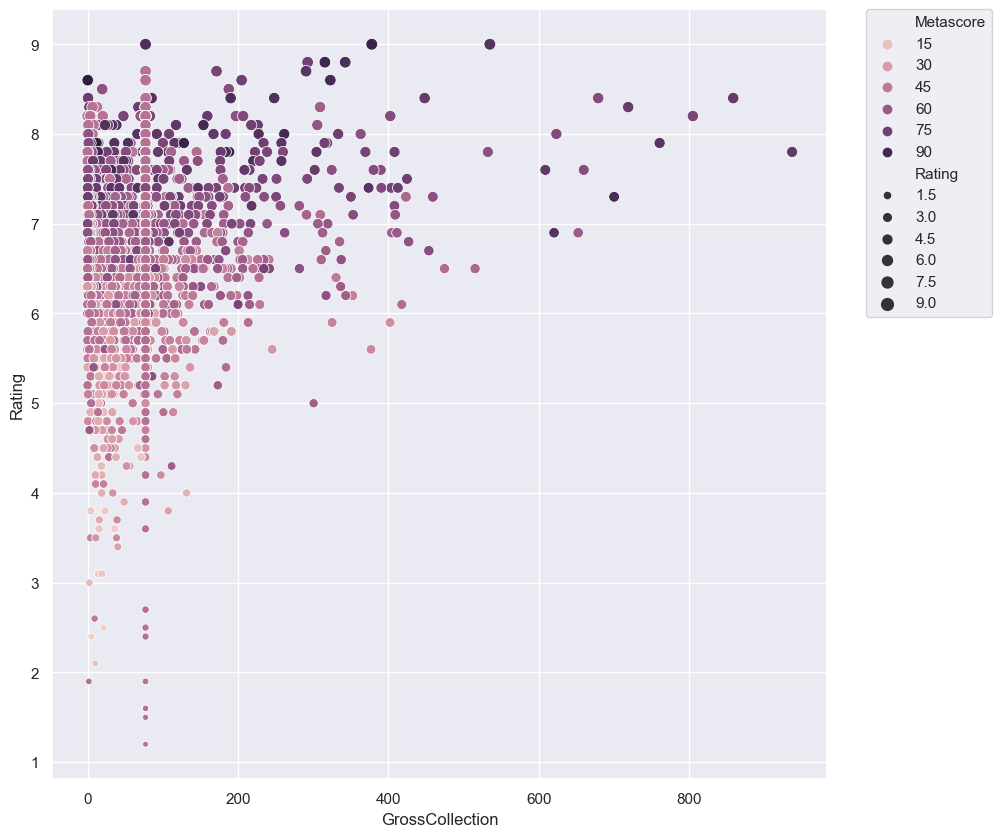

In [29]:
sns.set(font_scale=1)
fig_dims=(10, 10)
fig, ax=plt.subplots(figsize=fig_dims)
ax=sns.scatterplot(x="GrossCollection", y="Rating",
                      hue="Metascore", size="Rating",
                      data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We can have the following conclusions :-

    -Higher rated movies have been found to have higher gross collection.
    -Even with high rating and metascore, movies have been found to be grossing below average.
    

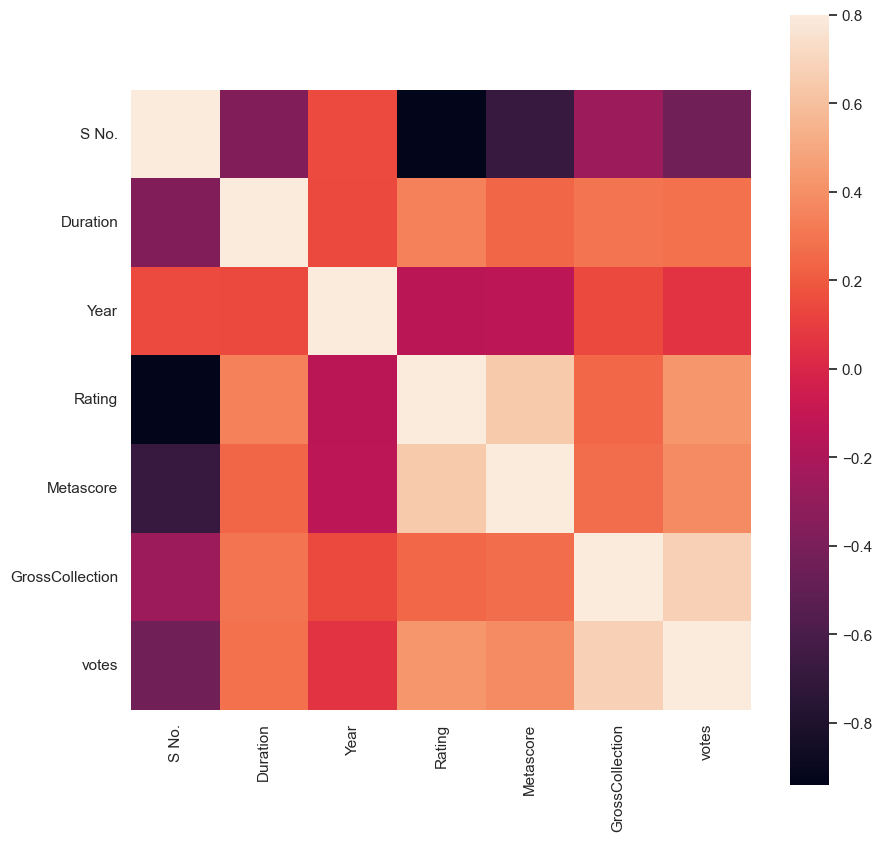

In [30]:
f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), vmax=.8, square=True)
plt.show()

Metascore and rating are co related.

Gross collection and votes are co related.

# Preparing for machine learning

#### Dropping off columns which are not useful for machine learning


In [31]:
df.columns

Index(['S No.', 'MovieName', 'Duration', 'Year', 'Rating', 'Metascore',
       'Director1', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2',
       'Genre3', 'GrossCollection', 'Certification', 'votes'],
      dtype='object')

In [32]:
df1=df.drop(["S No.","MovieName",], axis=1)

#### Encoding the categorical data

In [33]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
df1['Director1']=le.fit_transform(df1['Director1'])
df1['Star1']=le.fit_transform(df1['Star1'])
df1['Star2']=le.fit_transform(df1['Star2'])
df1['Star3']=le.fit_transform(df1['Star3'])
df1['Star4']=le.fit_transform(df1['Star4'])
df1['Genre1']=le.fit_transform(df1['Genre1'])
df1['Genre2']=le.fit_transform(df1['Genre2'])
df1['Genre3']=le.fit_transform(df1['Genre3'])
df1['Certification']=le.fit_transform(df1['Certification'])

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 0 to 1755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Duration         1752 non-null   int64  
 1   Year             1752 non-null   int64  
 2   Rating           1752 non-null   float64
 3   Metascore        1752 non-null   int32  
 4   Director1        1752 non-null   int32  
 5   Star1            1752 non-null   int32  
 6   Star2            1752 non-null   int32  
 7   Star3            1752 non-null   int32  
 8   Star4            1752 non-null   int32  
 9   Genre1           1752 non-null   int32  
 10  Genre2           1752 non-null   int32  
 11  Genre3           1752 non-null   int32  
 12  GrossCollection  1752 non-null   float64
 13  Certification    1752 non-null   int32  
 14  votes            1752 non-null   int32  
dtypes: float64(2), int32(11), int64(2)
memory usage: 208.3 KB


All columns have been converted into integer or float datatype.

### Outlier Treatment
using z-score

In [35]:
z=np.abs(zscore(df1))
dfn=df1[(z<3).all(axis=1)]
dfn

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
8,153,2020,8.7,48,864,641,870,93,1368,0,5,4,77.06093,12,119681
19,101,2003,8.4,77,659,110,1151,642,740,0,5,11,0.71000,10,598073
20,137,1986,8.4,84,367,619,765,177,1046,0,1,13,85.16000,10,734020
23,145,2019,8.4,48,538,363,820,96,428,0,1,3,77.06093,6,36373
24,141,2019,8.4,48,917,165,713,984,1032,0,5,4,77.06093,6,31300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,95,1997,3.6,11,449,565,1053,503,1211,0,1,6,35.93000,8,56548
1734,99,2017,3.6,48,26,569,342,965,1051,0,5,4,77.06093,10,33485
1735,98,1996,3.5,40,193,511,49,14,279,0,11,4,3.79000,10,30365
1736,89,2011,3.5,37,760,308,508,580,1177,0,1,2,38.54000,7,27068


In [36]:
df1

,Duration,Year,Rating,Metascore,Director1,Star1,Star2,Star3,Star4,Genre1,Genre2,Genre3,GrossCollection,Certification,votes
0,140,2023,9.0,86,412,614,402,155,829,1,0,0,77.06093,7,134603
1,152,2008,9.0,84,152,120,413,2,903,0,4,4,534.86000,8,2726773
2,201,2003,9.0,94,686,186,1104,466,1021,0,1,4,377.85000,8,1891735
3,148,2010,8.8,74,152,414,566,354,725,0,1,13,292.58000,8,2420015
4,178,2001,8.8,92,686,186,431,943,1228,0,1,4,315.54000,8,1920289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,109,2021,1.9,48,705,583,279,1010,518,0,4,15,77.06093,12,178935
1752,160,2018,1.9,48,725,44,975,143,520,0,4,15,1.69000,6,47714
1753,85,2015,1.6,48,811,194,469,1085,1415,0,7,13,77.06093,10,42919
1754,125,2021,1.5,48,499,699,61,111,411,0,4,4,77.06093,10,39580


In [37]:
(1739-1470)*100/1739

15.468660149511214

15.5 % has been removed in outlier treatment, which is under considerable range.

### Skewness Treatment

In [38]:
dfn.skew()

Duration           0.813869
Year              -0.908063
Rating            -0.318275
Metascore          0.162227
Director1         -0.113410
Star1              0.024989
Star2             -0.023172
Star3              0.037556
Star4              0.035787
Genre1             0.000000
Genre2             1.323096
Genre3             0.315911
GrossCollection    1.826342
Certification     -0.188483
votes              1.951636
dtype: float64

We will use power transform method to remove the skewness for columns with skewness greater than 0.5, except for gross collection and votes as we need to prepare models for them.

In [39]:
from sklearn.preprocessing import power_transform

for i in dfn.drop(["GrossCollection","votes"],axis=1).columns:
    if abs(dfn[f'{i}'].skew())>0.5:
        dfn[[f'{i}']]=power_transform(dfn[[f'{i}']],method='yeo-johnson')
        print("treated skewness for :",i)
    else:
        continue

treated skewness for : Duration
treated skewness for : Year
treated skewness for : Genre2


In [40]:
dfn.skew()

Duration           0.022584
Year              -0.349413
Rating            -0.318275
Metascore          0.162227
Director1         -0.113410
Star1              0.024989
Star2             -0.023172
Star3              0.037556
Star4              0.035787
Genre1             0.000000
Genre2             0.061505
Genre3             0.315911
GrossCollection    1.826342
Certification     -0.188483
votes              1.951636
dtype: float64

Skewness has been removed from all the required columns

# To prepare model for Gross Collection.

### Scaling of Independent features

In [41]:
X=dfn.drop(["GrossCollection"],axis=1)
y=dfn["GrossCollection"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

### Predicting the best random state

In [42]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.4815999632678406
At random state 0, The test accuracy is :-0.5004685140520841


At random state 1, The training accuracy is :-0.49914293532396725
At random state 1, The test accuracy is :-0.45409918813017947


At random state 2, The training accuracy is :-0.4944324909641462
At random state 2, The test accuracy is :-0.4659705930783653


At random state 3, The training accuracy is :-0.5127173268740881
At random state 3, The test accuracy is :-0.4383855102099581


At random state 4, The training accuracy is :-0.4903453413324905
At random state 4, The test accuracy is :-0.48515098258496137


At random state 5, The training accuracy is :-0.49607004318279346
At random state 5, The test accuracy is :-0.4750460026452554


At random state 6, The training accuracy is :-0.5035687856151162
At random state 6, The test accuracy is :-0.4587261341441632


At random state 7, The training accuracy is :-0.4764915790584794
At random state 7, The test accurac

At random state 66, The training accuracy is :-0.4449930388186971

At random state 66, The test accuracy is :-0.5614280456806506

In [43]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=66)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(990, 14) (990,)
(488, 14) (488,)


In [44]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 33.08955978200802
Mean Squared Error: 1822.2093293249152
Root Mean Squared Error: 42.68734390103131
R squared score:  0.5057708134204575
Cross Validation Score is : [0.48346075 0.44428729 0.38905677 0.5706455  0.40105586]
Mean Score : 0.45770123321704625
Difference : -0.04806958020341123


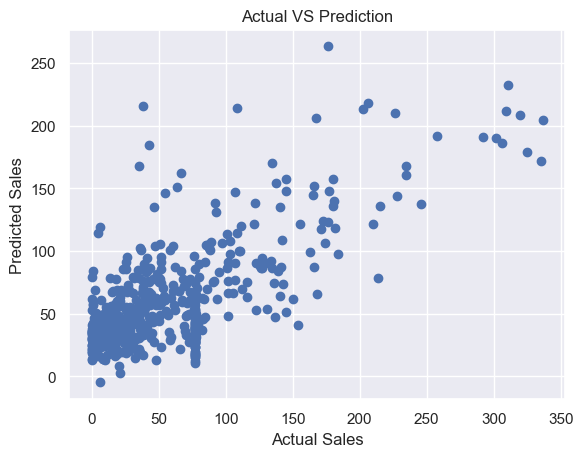



Scores for Lasso() are
Mean Absolute Error: 33.1146780103397
Mean Squared Error: 1814.426308298077
Root Mean Squared Error: 42.596083250670794
R squared score:  0.5078817652684819
Cross Validation Score is : [0.48137849 0.45623954 0.39177456 0.56768636 0.40765388]
Mean Score : 0.4609465652443224
Difference : -0.04693520002415952


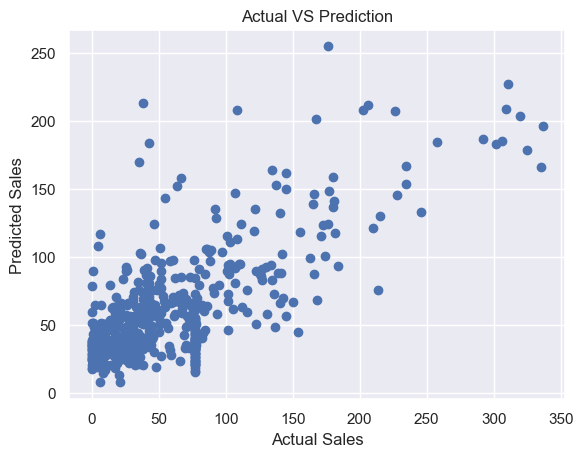



Scores for SVR() are
Mean Absolute Error: 38.486060496792945
Mean Squared Error: 3012.5423736414677
Root Mean Squared Error: 54.88663201218916
R squared score:  0.1829224321813656
Cross Validation Score is : [0.1057721  0.16279986 0.09413722 0.12541415 0.09702785]
Mean Score : 0.11703023510174637
Difference : -0.06589219707961924


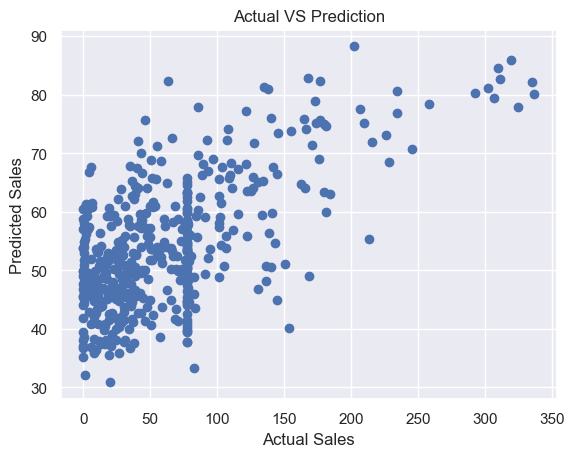



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 37.504840336438406
Mean Squared Error: 2993.11891919601
Root Mean Squared Error: 54.70940430306302
R squared score:  0.1881905635297546
Cross Validation Score is : [ 0.23872561 -0.2173657  -0.07455654  0.25676398  0.17695416]
Mean Score : 0.07610430074648236
Difference : -0.11208626278327224


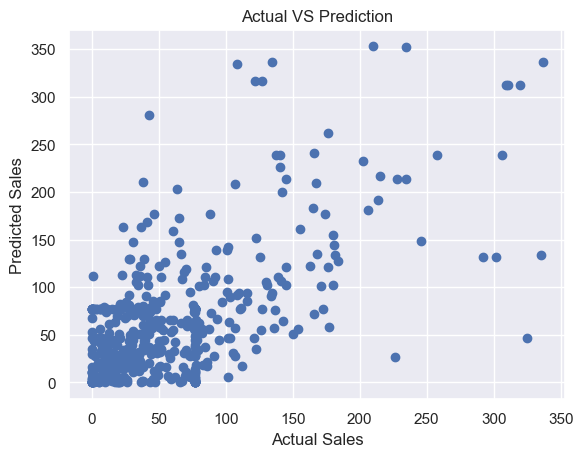



Scores for RandomForestRegressor() are
Mean Absolute Error: 29.336003862419737
Mean Squared Error: 1516.1234565172342
Root Mean Squared Error: 38.937430019420056
R squared score:  0.5887890317484659
Cross Validation Score is : [0.5703549  0.56094754 0.51777969 0.66024422 0.52521392]
Mean Score : 0.5669080540719732
Difference : -0.021880977676492663


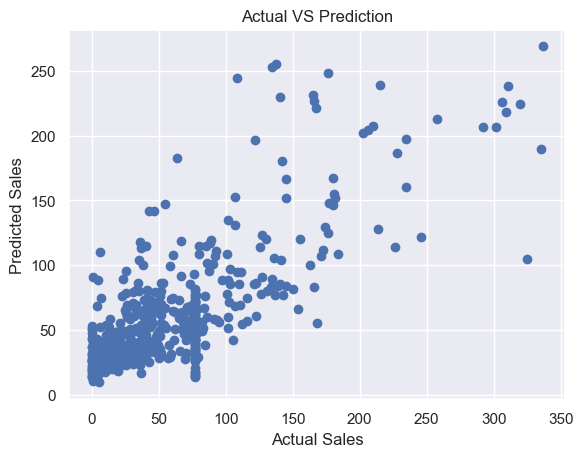



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 28.114314296475868
Mean Squared Error: 1400.4499567425414
Root Mean Squared Error: 37.42258618458299
R squared score:  0.6201626060038645
Cross Validation Score is : [0.61399923 0.57599029 0.55709968 0.65983845 0.55282185]
Mean Score : 0.591949899595581
Difference : -0.02821270640828355


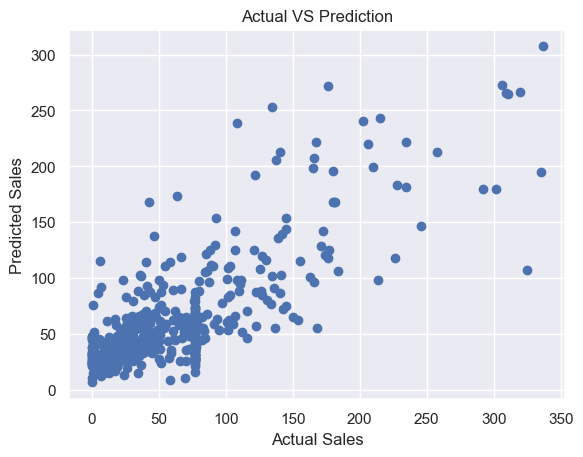

In [45]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

### It is evident that GradientBoostingRegressor() gives the best result.  Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

## Hyperparamter Tuning and treating overfitting/underfitting

In [46]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [47]:
param ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3]
}

In [48]:
gv=GridSearchCV(gbr,param, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'loss': 'huber',
 'max_depth': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [49]:
GB= GradientBoostingRegressor(criterion= 'squared_error',learning_rate= 0.2,loss= 'squared_error',min_samples_split= 2,max_depth= 2,n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=68)
GB.fit(x_train,y_train)
GB_predict_train=GB.predict(x_train)
GB_predict_test=GB.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB_predict_test)))

The r2 score is: 0.5947734030843679
The mean absolute error 28.906263875189698
root_mean_squared_error: 40.94013825506161


In [50]:
import joblib
joblib.dump(GB,"gross_collection.obj")

['gross_collection.obj']

In [51]:
GB_l=joblib.load('gross_collection.obj')

# To prepare model for  Number of votes.

### Scaling of Independent Features

In [52]:
X=dfn.drop(["votes"],axis=1)
y=dfn["votes"]
st=StandardScaler()
xf=st.fit_transform(X)
x=pd.DataFrame(data=xf, columns=X.columns)

### Predicting the best random state

In [53]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is :{r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is :{r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :0.5363396762379629
At random state 0, The test accuracy is :0.531565693827228


At random state 1, The training accuracy is :0.5247522621061134
At random state 1, The test accuracy is :0.553588178523586


At random state 2, The training accuracy is :0.5380640397519233
At random state 2, The test accuracy is :0.5232625471116392


At random state 3, The training accuracy is :0.5557774891859422
At random state 3, The test accuracy is :0.49488750118381386


At random state 4, The training accuracy is :0.5308684434929842
At random state 4, The test accuracy is :0.5415122753181072


At random state 5, The training accuracy is :0.5447002198778067
At random state 5, The test accuracy is :0.5130884441691188


At random state 6, The training accuracy is :0.5455048291518119
At random state 6, The test accuracy is :0.5141871892000784


At random state 7, The training accuracy is :0.5273694530190207
At random state 7, The test accuracy is :0.548282222855

At random state 1, The training accuracy is :0.4882717245427457
At random state 1, The test accuracy is :0.6218999865494999

In [54]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=1)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(990, 14) (990,)
(488, 14) (488,)


Scores for LinearRegression() are
Mean Absolute Error: 78749.38463336998
Mean Squared Error: 11385458215.817673
Root Mean Squared Error: 106702.66264633546
R squared score:  0.553588178523586
Cross Validation Score is : [0.46901993 0.56439307 0.41558055 0.51083706 0.55738575]
Mean Score : 0.5034432738482855
Difference : -0.05014490467530053


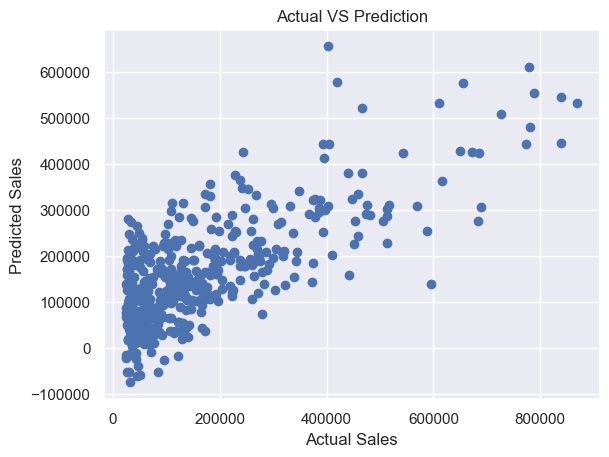



Scores for Lasso() are
Mean Absolute Error: 78748.93579008195
Mean Squared Error: 11385400781.367239
Root Mean Squared Error: 106702.39351283194
R squared score:  0.5535904304678774
Cross Validation Score is : [0.46902154 0.56439209 0.41558188 0.51084354 0.55738787]
Mean Score : 0.5034453832521985
Difference : -0.05014504721567892


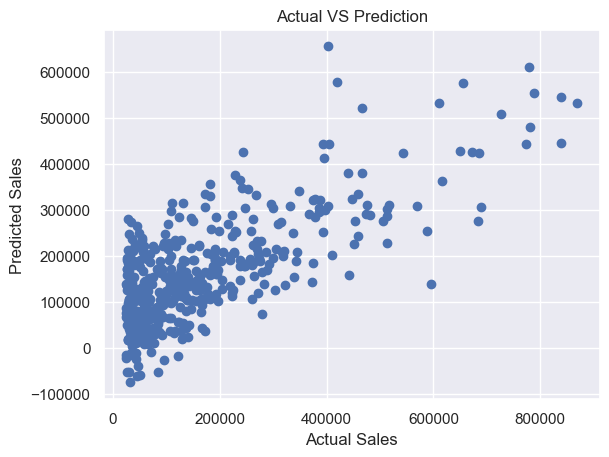



Scores for SVR() are
Mean Absolute Error: 107327.72956047885
Mean Squared Error: 30297081729.96555
Root Mean Squared Error: 174060.56914179487
R squared score:  -0.1879166550981346
Cross Validation Score is : [-0.19951344 -0.24523008 -0.12715739 -0.12579715 -0.09188535]
Mean Score : -0.15791668165084913
Difference : 0.029999973447285472


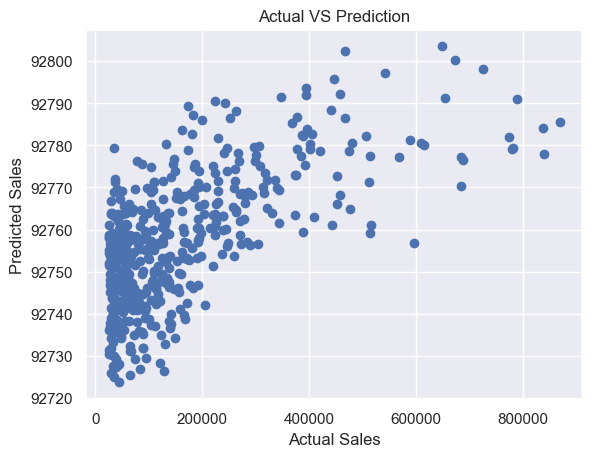



Scores for DecisionTreeRegressor() are
Mean Absolute Error: 82701.22336065574
Mean Squared Error: 15787588628.018442
Root Mean Squared Error: 125648.67141366216
R squared score:  0.3809852829319894
Cross Validation Score is : [0.13206682 0.39571742 0.4056806  0.32244069 0.57420668]
Mean Score : 0.366022439756425
Difference : -0.0149628431755644


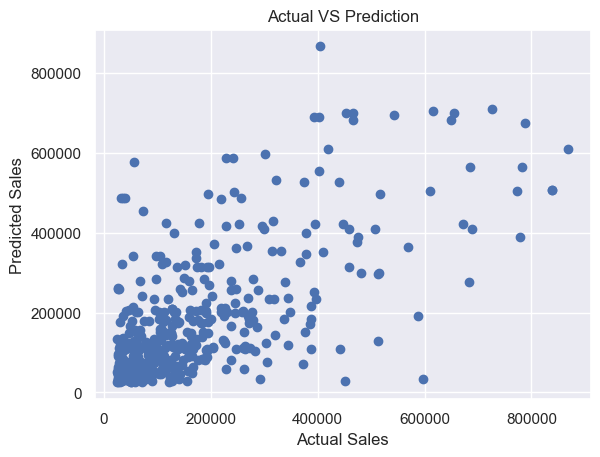



Scores for RandomForestRegressor() are
Mean Absolute Error: 59849.97827868852
Mean Squared Error: 7433975946.839217
Root Mean Squared Error: 86220.50769300316
R squared score:  0.7085216352004318
Cross Validation Score is : [0.63642398 0.7332413  0.64138366 0.70077207 0.76404274]
Mean Score : 0.6951727504143042
Difference : -0.013348884786127613


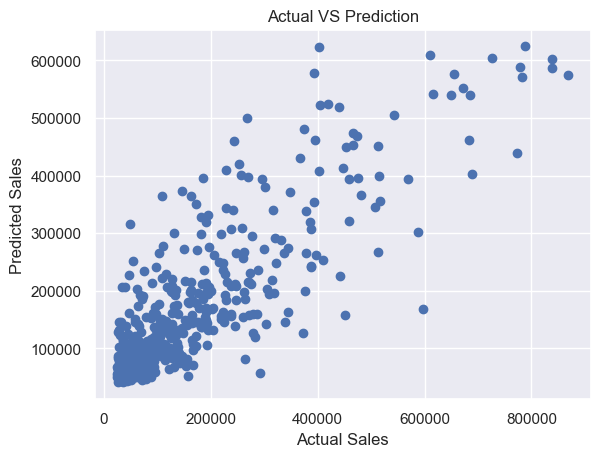



Scores for GradientBoostingRegressor() are
Mean Absolute Error: 55396.72190174805
Mean Squared Error: 6413824246.050983
Root Mean Squared Error: 80086.35493048103
R squared score:  0.7485207086060541
Cross Validation Score is : [0.70018225 0.78915105 0.65916997 0.72902361 0.81653323]
Mean Score : 0.7388120231913389
Difference : -0.009708685414715257


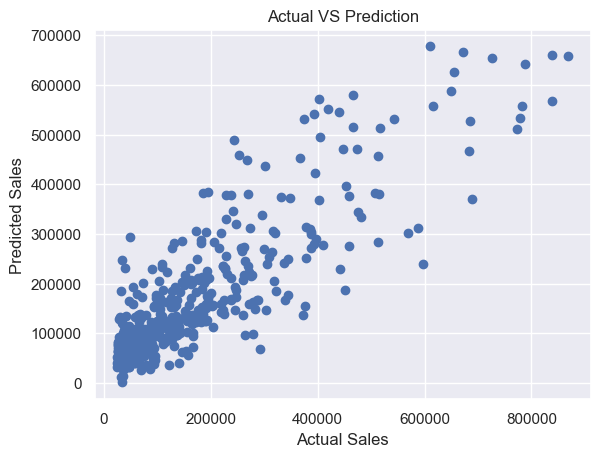

In [55]:
model=[lr,lasso,svr,dtr,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', metrics.mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("==============================================\n\n\n====================================================")

### It is evident that GradientBoostingRegressor() gives the best result. Gradient boosting builds models in a sequential manner, where each subsequent model corrects the mistakes of the previous model. As the dataset we have is small. It will give the best predictive result.

### Hyperparamter Tuning and treating overfitting/underfitting

In [56]:
param1 ={
       'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
      'learning_rate':[0.1,0.2],
     'n_estimators':[50,100,200],
    'criterion':['friedman_mse', 'squared_error'],
    'max_depth':[1,2],
    "min_samples_split":[2,3],
    'min_samples_leaf':[1,2]
}

In [57]:
gv=GridSearchCV(gbr,param1, refit=True)
gv.fit(train_x,train_y)
gv.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [58]:
GB1=GradientBoostingRegressor(criterion='squared_error',
 learning_rate= 0.2,
 loss='huber',
 max_depth= 2,
 min_samples_leaf=2,
 min_samples_split= 2,
 n_estimators= 200) 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)
GB1.fit(x_train,y_train)
GB1_predict_train=GB1.predict(x_train)
GB1_predict_test=GB1.predict(x_test)
print('The r2 score is:', r2_score(y_test, GB1_predict_test))
print('The mean absolute error', mean_absolute_error(y_test, GB1_predict_test))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,GB1_predict_test)))

The r2 score is: 0.7542937682217327
The mean absolute error 55196.7453043691
root_mean_squared_error: 79161.77057553547


In [59]:
import joblib
joblib.dump(GB1,"votes.obj")

['votes.obj']

In [60]:
GB1_l=joblib.load('votes.obj')